In [6]:
!pip install -r requirements.txt

     ---------------------------------------- 0.0/689.0 kB ? eta -:--:--
      --------------------------------------- 10.2/689.0 kB ? eta -:--:--
      --------------------------------------- 10.2/689.0 kB ? eta -:--:--
      --------------------------------------- 10.2/689.0 kB ? eta -:--:--
      --------------------------------------- 10.2/689.0 kB ? eta -:--:--
     - ----------------------------------- 30.7/689.0 kB 146.3 kB/s eta 0:00:05
     -- ---------------------------------- 41.0/689.0 kB 179.6 kB/s eta 0:00:04
     ---- -------------------------------- 92.2/689.0 kB 350.1 kB/s eta 0:00:02
     -------------- --------------------- 286.7/689.0 kB 983.9 kB/s eta 0:00:01
     ---------------------------- --------- 522.2/689.0 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 689.0/689.0 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  

In [10]:
!pip install thrift_sasl

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pure-sasl: filename=pure_sasl-0.6.2-py3-none-any.whl size=11439 sha256=40f5e760ae308c2f38f61f34af792a006c851c8d87e6f5a7b9e90403ea2dc71b
  Stored in directory: c:\users\darek\appdata\local\pip\cache\wheels\57\7c\93\062238b0a68efe214024ca178233f248971045db1033c96a52
Successfully built pure-sasl


In [101]:
from pyhive import hive
import pandas as pd

conn = hive.Connection(
    host="127.0.0.1",   
    port=10000,         
    username="vagrant", 
    database="gold"     
)

df = pd.read_sql("""
    SELECT
        station_id,
        station_name,
        area_id,
        lat,
        lon,
        events_ts,
        dt,
        hour,
        bikes_available,
        slots_available,
        occupancy_ratio,
        temperature_avg,
        wind_speed_avg,
        precipitation_sum,
        trips_count,
        avg_delay_minutes,
        canceled_trips_count,
        gold_ingestion_ts
    FROM gold.bike_weather_bvg_features
""", conn)


df.head()


C:\Users\Darek\AppData\Local\Temp\ipykernel_27200\1993937410.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,station_id,station_name,area_id,lat,lon,events_ts,dt,hour,bikes_available,slots_available,occupancy_ratio,temperature_avg,wind_speed_avg,precipitation_sum,trips_count,avg_delay_minutes,canceled_trips_count,gold_ingestion_ts
0,10321452,Winterfeldtstraße/Frobenstraße,362,52.496352,13.358946,2026-01-19 00:50:45.580,2026-01-19,0,1,3,0.250,None,None,None,None,None,None,2026-01-19 01:28:50.526
1,10456931,Schmollerplatz,362,52.490201,13.445106,2026-01-19 00:50:45.580,2026-01-19,0,0,4,0.000,None,None,None,None,None,None,2026-01-19 01:28:50.526
2,107232811,Jelbi Betriebshof Indira-Gandhi-Straße (ALT/IN),362,52.544690,13.468820,2026-01-19 00:50:45.580,2026-01-19,0,1,2,0.333,None,None,None,None,None,None,2026-01-19 01:28:50.526
3,107252242,S+U Westhafen (Süd),362,52.534000,13.344028,2026-01-19 00:50:45.580,2026-01-19,0,0,4,0.000,None,None,None,None,None,None,2026-01-19 01:28:50.526
4,107253716,S Hohenzollerndamm (Süd),362,52.488520,13.301482,2026-01-19 00:50:45.580,2026-01-19,0,0,8,0.000,None,None,None,None,None,None,2026-01-19 01:28:50.526


In [99]:
conn2 = hive.Connection(
    host="127.0.0.1",
    port=10000,
    username="vagrant",
    database="silver"
)

df2 = pd.read_sql("""
    SELECT
        station_id,
        station_name,
        area_id,
        lat,
        lon,
        events_ts,
        dt,
        hour,
        bikes_available,
        slots_available,
        is_reserved,
        is_disabled
    FROM silver.nextbike_states
""", conn2)

df2.head()

C:\Users\Darek\AppData\Local\Temp\ipykernel_27200\1043251780.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql("""


,station_id,station_name,area_id,lat,lon,events_ts,dt,hour,bikes_available,slots_available,is_reserved,is_disabled
0,10321394,Torgauer Straße/Cherusker Straße,362,52.480154,13.358919,2026-01-19 00:50:45.580,2026-01-19,0,1,3,0,0
1,10321496,Kulturforum,362,52.508206,13.367100,2026-01-19 00:50:45.580,2026-01-19,0,2,2,0,0
2,10438307,Schinkestraße/Maybachufer,362,52.494437,13.424663,2026-01-19 00:50:45.580,2026-01-19,0,1,3,0,0
3,107255553,S Olympiastadion (Flatowbrücke),362,52.510889,13.240806,2026-01-19 00:50:45.580,2026-01-19,0,0,4,0,0
4,107256613,S Wollankstraße (Sternstraße),362,52.565752,13.390951,2026-01-19 00:50:45.580,2026-01-19,0,5,0,0,0


In [100]:
df2.describe()

,lat,lon,events_ts,hour,bikes_available,slots_available,is_reserved,is_disabled
count,2076.000000,2076.000000,2076,2076.0,2076.000000,2076.000000,2076.0,2076.0
mean,52.500211,13.410888,2026-01-19 00:50:45.580000,0.0,0.991811,3.928227,0.0,0.0
min,52.408540,13.153335,2026-01-19 00:50:45.580000,0.0,0.000000,0.000000,0.0,0.0
25%,52.473107,13.348549,2026-01-19 00:50:45.580000,0.0,0.000000,3.000000,0.0,0.0
50%,52.501523,13.407434,2026-01-19 00:50:45.580000,0.0,0.000000,4.000000,0.0,0.0
75%,52.523409,13.468243,2026-01-19 00:50:45.580000,0.0,1.000000,4.000000,0.0,0.0
max,52.595837,13.721039,2026-01-19 00:50:45.580000,0.0,17.000000,20.000000,0.0,0.0
std,0.035251,0.085328,NaN,0.0,1.695190,2.144908,0.0,0.0


In [102]:
df.describe()

,lat,lon,events_ts,hour,bikes_available,slots_available,occupancy_ratio,gold_ingestion_ts
count,2076.000000,2076.000000,2076,2076.0,2076.000000,2076.000000,2075.000000,2076
mean,52.500211,13.410888,2026-01-19 00:50:45.580000,0.0,0.991811,3.928227,0.190074,2026-01-19 01:28:50.525999872
min,52.408540,13.153335,2026-01-19 00:50:45.580000,0.0,0.000000,0.000000,0.000000,2026-01-19 01:28:50.526000
25%,52.473107,13.348549,2026-01-19 00:50:45.580000,0.0,0.000000,3.000000,0.000000,2026-01-19 01:28:50.526000128
50%,52.501523,13.407434,2026-01-19 00:50:45.580000,0.0,0.000000,4.000000,0.000000,2026-01-19 01:28:50.526000128
75%,52.523409,13.468243,2026-01-19 00:50:45.580000,0.0,1.000000,4.000000,0.250000,2026-01-19 01:28:50.526000128
max,52.595837,13.721039,2026-01-19 00:50:45.580000,0.0,17.000000,20.000000,1.000000,2026-01-19 01:28:50.526000
std,0.035251,0.085328,NaN,0.0,1.695190,2.144908,0.268484,NaN


In [103]:
null_report = (df.isnull().sum() / len(df)) * 100
print(null_report)

station_id                0.00000
station_name              0.00000
area_id                   0.00000
lat                       0.00000
lon                       0.00000
events_ts                 0.00000
dt                        0.00000
hour                      0.00000
bikes_available           0.00000
slots_available           0.00000
occupancy_ratio           0.04817
temperature_avg         100.00000
wind_speed_avg          100.00000
precipitation_sum       100.00000
trips_count             100.00000
avg_delay_minutes       100.00000
canceled_trips_count    100.00000
gold_ingestion_ts         0.00000
dtype: float64


In [104]:
print(df.shape)
print(df['dt'].value_counts())
print(df['hour'].value_counts())
print(df[['temperature_avg','trips_count']].isna().mean())

(2076, 18)
dt
2026-01-19    2076
Name: count, dtype: int64
hour
0    2076
Name: count, dtype: int64
temperature_avg    1.0
trips_count        1.0
dtype: float64


In [105]:
import matplotlib.pyplot as plt

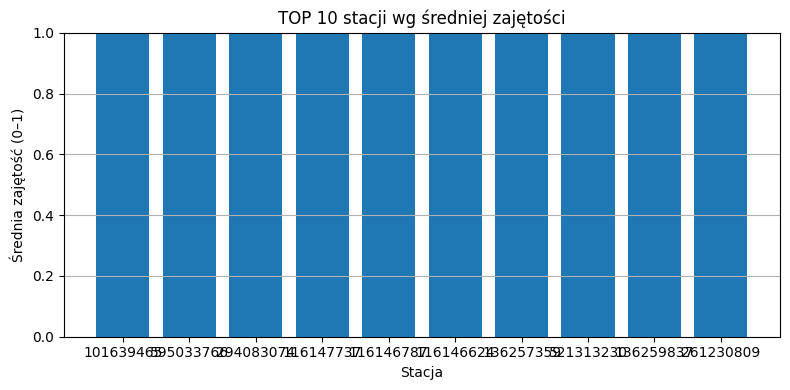

In [106]:
station_rank = (
    df.groupby(["station_id", "station_name"], as_index=False)
      .agg(
          avg_occupancy=("occupancy_ratio", "mean"),
          avg_bikes=("bikes_available", "mean"),
          avg_slots=("slots_available", "mean"),
      )
      .sort_values("avg_occupancy", ascending=False)
)

top_n = 10
top = station_rank.head(top_n)

plt.figure(figsize=(8, 4))
plt.bar(top["station_id"].astype(str), top["avg_occupancy"])
plt.xlabel("Stacja")
plt.ylabel("Średnia zajętość (0–1)")
plt.title(f"TOP {top_n} stacji wg średniej zajętości")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [107]:
station_rank = (
    df.groupby(["station_id", "station_name"], as_index=False)
      .agg(
          avg_occupancy=("occupancy_ratio", "mean"),
          avg_bikes_available=("bikes_available", "mean"),
          avg_slots_available=("slots_available", "mean")
      )
      .sort_values("avg_occupancy", ascending=False)
)

station_rank = station_rank.rename(columns={"avg_occupancy": "avg_rentals_per_hour"})

print("\nTOP 10 stacji wg średniej zajętości:")
print(station_rank.head(10))


TOP 10 stacji wg średniej zajętości:
     station_id                                  station_name  \
0     101639465                            Ackerstraße (Park)   
2000  595033766  Jelbi Brüder-Grimm-Gasse/Linkstraße (MIT/BL)   
1549  294083074       Jelbi Mauerstraße/Behrenstraße (MIT/MA)   
98    116147737                                   EDEKA Thaut   
95    116146787                           EDEKA Rigaer Straße   
94    116146624    EDEKA Riebe (Platz der Vereinten Nationen)   
419   136257359                    U Rüdesheimer Platz (Nord)   
1949  521313230                     Uber Platz (Mühlenstraße)   
424   136259837                 Koenigsallee/Oberhaardter Weg   
1456  261230809   Campus ESCP (Schlosspark-Klinik/Heubnerweg)   

      avg_rentals_per_hour  avg_bikes_available  avg_slots_available  
0                      1.0                  8.0                  0.0  
2000                   1.0                  5.0                  0.0  
1549                   1.0       

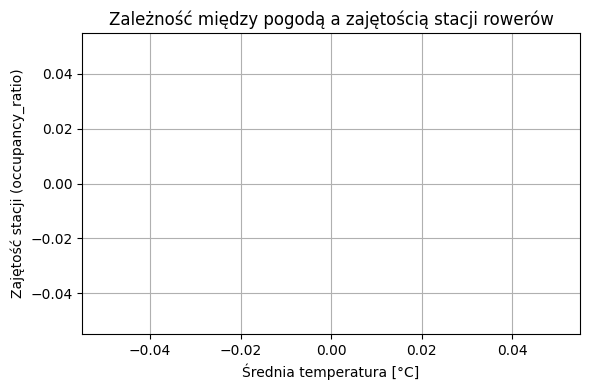

In [108]:
temp_occ = df.dropna(subset=["occupancy_ratio", "temperature_avg"])

plt.figure(figsize=(6, 4))
plt.scatter(temp_occ["temperature_avg"], temp_occ["occupancy_ratio"], alpha=0.3)
plt.xlabel("Średnia temperatura [°C]")
plt.ylabel("Zajętość stacji (occupancy_ratio)")
plt.title("Zależność między pogodą a zajętością stacji rowerów")
plt.grid(True)
plt.tight_layout()
plt.show()


Profil dobowy – średnia zajętość i liczba kursów BVG wg godziny:
   hour  avg_occupancy avg_trips
0     3            0.0       NaN


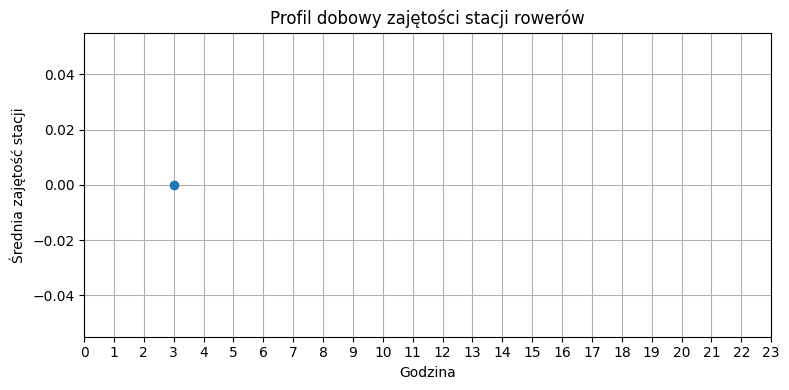

In [68]:
hourly_profile = (
    df.groupby("hour", as_index=False)
      .agg(
          avg_occupancy=("occupancy_ratio", "mean"),
          avg_trips=("trips_count", "mean"),
      )
      .sort_values("hour")
)

print("\nProfil dobowy – średnia zajętość i liczba kursów BVG wg godziny:")
print(hourly_profile)

plt.figure(figsize=(8, 4))
plt.plot(hourly_profile["hour"], hourly_profile["avg_occupancy"], marker="o")
plt.xlabel("Godzina")
plt.ylabel("Średnia zajętość stacji")
plt.title("Profil dobowy zajętości stacji rowerów")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

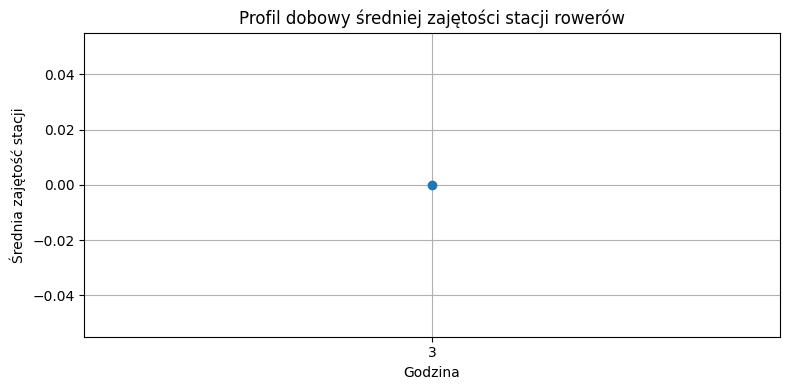

In [69]:
hourly_profile = (
    df.groupby("hour", as_index=False)
      .agg(
          avg_occupancy=("occupancy_ratio", "mean"),
      )
      .sort_values("hour")
)

plt.figure(figsize=(8, 4))
plt.plot(hourly_profile["hour"], hourly_profile["avg_occupancy"], marker="o")
plt.xlabel("Godzina")
plt.ylabel("Średnia zajętość stacji")
plt.title("Profil dobowy średniej zajętości stacji rowerów")
plt.xticks(hourly_profile["hour"])
plt.grid(True)
plt.tight_layout()
plt.show()


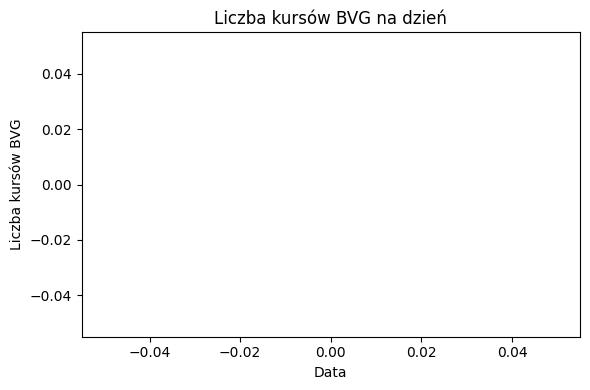

In [70]:
bvg_daily = (
    df[["dt", "trips_count"]]
      .dropna()
      .drop_duplicates()
      .sort_values("dt")
)

plt.figure(figsize=(6, 4))
plt.bar(bvg_daily["dt"].astype(str), bvg_daily["trips_count"])
plt.xlabel("Data")
plt.ylabel("Liczba kursów BVG")
plt.title("Liczba kursów BVG na dzień")
plt.tight_layout()
plt.show()


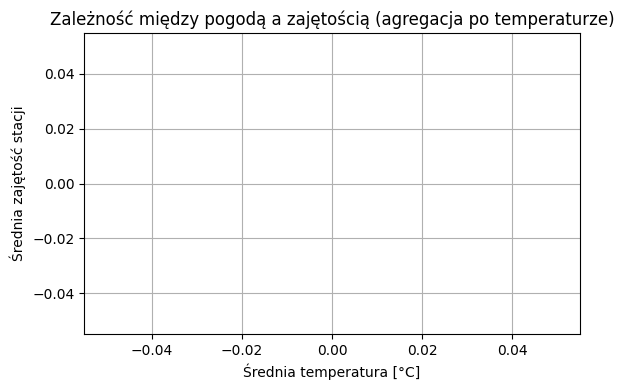

In [71]:
temp_agg = (
    df.dropna(subset=["occupancy_ratio", "temperature_avg"])
      .groupby("temperature_avg", as_index=False)
      .agg(
          avg_occupancy=("occupancy_ratio", "mean")
      )
)

plt.figure(figsize=(6, 4))
plt.scatter(temp_agg["temperature_avg"], temp_agg["avg_occupancy"])
plt.xlabel("Średnia temperatura [°C]")
plt.ylabel("Średnia zajętość stacji")
plt.title("Zależność między pogodą a zajętością (agregacja po temperaturze)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
df["hour_of_day"] = df["hour_start"].dt.hour
df["dt"] = pd.to_datetime(df["dt"], errors="coerce", infer_datetime_format=True)
df["day_of_week"] = df["dt"].dt.dayofweek  # 0 = poniedziałek


KeyError: 'hour_start'

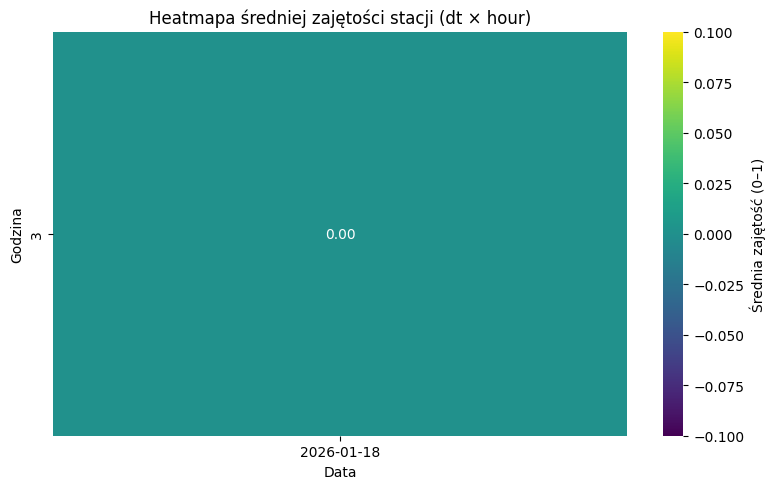

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

heat = (
    df.groupby(["dt", "hour"])["occupancy_ratio"]
      .mean()
      .reset_index()
      .pivot(index="hour", columns="dt", values="occupancy_ratio")
      .sort_index()
)

plt.figure(figsize=(8, 5))
sns.heatmap(
    heat,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    cbar_kws={"label": "Średnia zajętość (0–1)"}
)
plt.xlabel("Data")
plt.ylabel("Godzina")
plt.title("Heatmapa średniej zajętości stacji (dt × hour)")
plt.tight_layout()
plt.show()


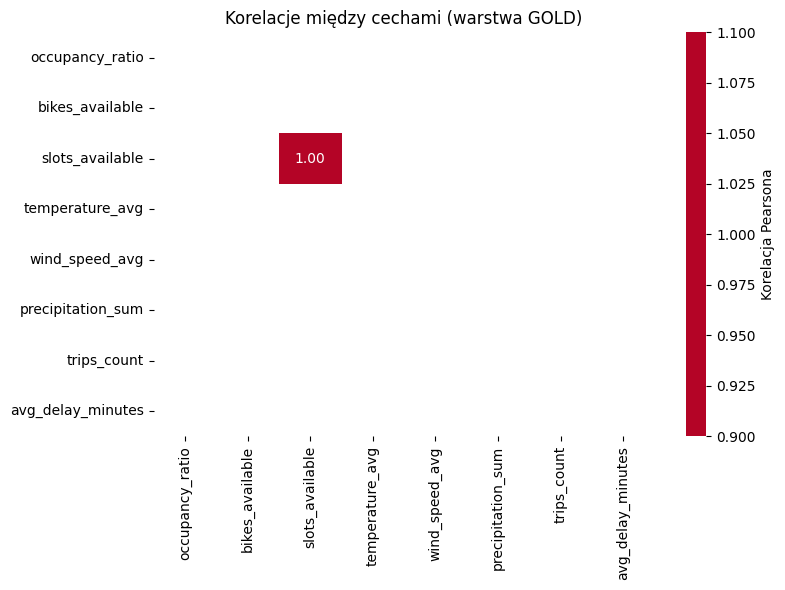

In [73]:
num_cols = [
    "occupancy_ratio",
    "bikes_available",
    "slots_available",
    "temperature_avg",
    "wind_speed_avg",
    "precipitation_sum",
    "trips_count",
    "avg_delay_minutes",
]

corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar_kws={"label": "Korelacja Pearsona"}
)
plt.title("Korelacje między cechami (warstwa GOLD)")
plt.tight_layout()
plt.show()


In [74]:
import numpy as np
import matplotlib.pyplot as plt

def radar_for_station(df, station_id):
    metrics = ["occupancy_ratio", "bikes_available", "slots_available", "trips_count"]
    labels = ["Śr. zajętość", "Śr. rowery", "Śr. sloty", "Śr. kursy BVG"]

    agg = df.groupby("station_id")[metrics].mean()

    if station_id not in agg.index:
        raise ValueError(f"Brak stacji {station_id} w danych.")

    station_vals = agg.loc[station_id]
    mins = agg.min()
    maxs = agg.max()
    denom = (maxs - mins).replace(0, 1)
    norm_vals = ((station_vals - mins) / denom).values

    values = np.concatenate([norm_vals, [norm_vals[0]]])
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)
    angles = np.concatenate([angles, [angles[0]]])

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, values, "o-")
    ax.fill(angles, values, alpha=0.25)

    ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels)
    ax.set_ylim(0, 1)

    title_name = df.loc[df["station_id"] == station_id, "station_name"].iloc[0]
    ax.set_title(f"Profil stacji {station_id} ({title_name}) – wartości znormalizowane", pad=20)
    plt.tight_layout()
    plt.show()


C:\Users\Darek\AppData\Local\Temp\ipykernel_27200\4261244493.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  denom = (maxs - mins).replace(0, 1)


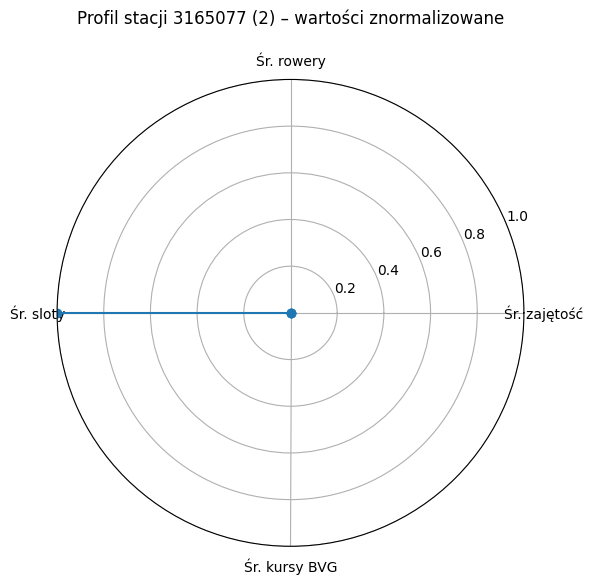

In [25]:
radar_for_station(df, station_id="3165077")  

In [75]:
print(df[["lat", "lon"]].isna().mean())

lat    0.0
lon    0.0
dtype: float64


Empty DataFrame
Columns: [dt, avg_occupancy, trips_count]
Index: []


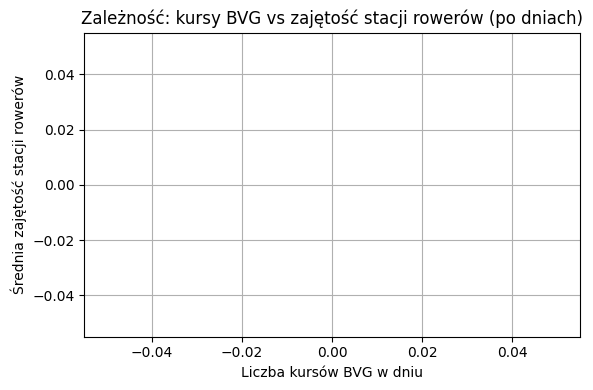

In [76]:
import matplotlib.pyplot as plt

daily = (
    df.groupby("dt", as_index=False)
      .agg(
          avg_occupancy=("occupancy_ratio", "mean"),
          trips_count=("trips_count", "mean")  # mean == max, bo stała w ramach dnia
      )
      .dropna(subset=["trips_count"])
      .sort_values("dt")
)

print(daily)

plt.figure(figsize=(6, 4))
plt.scatter(daily["trips_count"], daily["avg_occupancy"])
plt.xlabel("Liczba kursów BVG w dniu")
plt.ylabel("Średnia zajętość stacji rowerów")
plt.title("Zależność: kursy BVG vs zajętość stacji rowerów (po dniach)")
plt.grid(True)
plt.tight_layout()
plt.show()


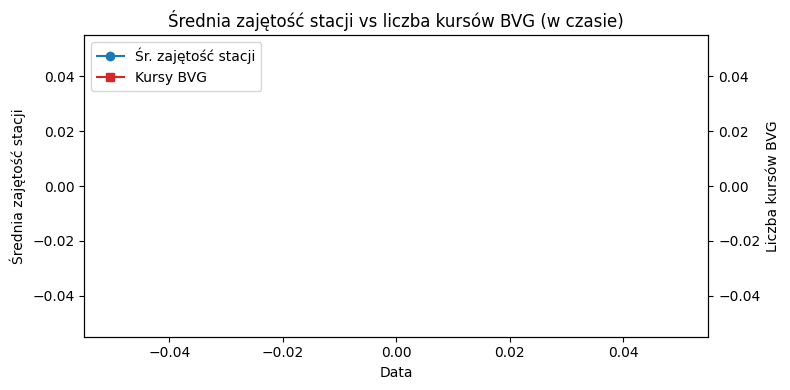

In [77]:
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.plot(daily["dt"], daily["avg_occupancy"], marker="o", label="Śr. zajętość stacji")
ax1.set_xlabel("Data")
ax1.set_ylabel("Średnia zajętość stacji")
ax1.tick_params(axis="y")

ax2 = ax1.twinx()
ax2.plot(daily["dt"], daily["trips_count"], color="tab:red", marker="s", label="Kursy BVG")
ax2.set_ylabel("Liczba kursów BVG")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.title("Średnia zajętość stacji vs liczba kursów BVG (w czasie)")
fig.tight_layout()
plt.show()


In [78]:
import folium

snapshot = df[(df["dt"] == df["dt"].min()) & (df["hour"] == df["hour"].max())]
snapshot = snapshot.dropna(subset=["lat", "lon"])

center_lat = snapshot["lat"].mean()
center_lon = snapshot["lon"].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

for _, row in snapshot.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=5,
        fill=True,
        fill_opacity=0.8,
        popup=f"{row['station_id']} – occ={row['occupancy_ratio']:.2f}",
    ).add_to(m)

m.save("mapka.html")



In [79]:
import webbrowser

webbrowser.open("mapka.html")

True